In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('../car_dataset/car.csv')

In [3]:
# df.info()
# df.head()
df.describe()
# df.shape

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [4]:

df.duplicated().sum()

np.int64(1202)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             205
seats                 208
dtype: int64

In [8]:
def data_clean(df):
    df['mileage']= df['mileage(km/ltr/kg)'].astype(str).str.extract('([0-9.]+)').astype(float)
    df['engine']= df['engine'].astype(str).str.extract('([0-9.]+)').astype(float)
    df['max_power'] = df['max_power'].astype(str).str.extract('([0-9.]+)').astype(float)
    df.drop(columns=['mileage(km/ltr/kg)'],inplace=True)
    df['mileage'].fillna(df['mileage'].median(), inplace=True)
    if df['seats'].dtype != 'float64' and df['seats'].dtype != 'int64':
        df['seats'] = pd.to_numeric(df['seats'], errors='coerce')
    df['seats'].fillna(df['seats'].mode()[0], inplace=True)
    df['seats'].fillna(df['seats'].mode()[0],inplace=True)
    df['engine'].fillna(df['engine'].median(),inplace=True)
    df['max_power'].fillna(df['max_power'].median(), inplace=True)
    return df

In [9]:
df= data_clean(df)

C:\Users\pc\AppData\Local\Temp\ipykernel_17340\2841409164.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_17340\2841409164.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
mileage          0
dtype: int64

<Axes: xlabel='max_power', ylabel='selling_price'>

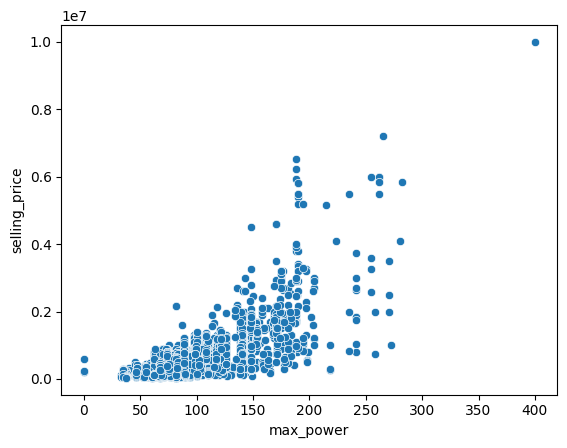

In [11]:
sns.scatterplot(x='max_power',y='selling_price',data=df)

<Axes: >

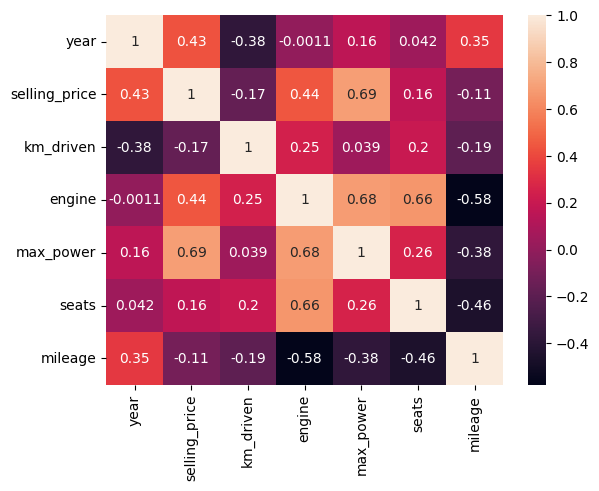

In [12]:

numeric_df = df.select_dtypes(include='number')


sns.heatmap(numeric_df.corr(), annot=True)



In [13]:
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner']= le.fit_transform(df['owner'])

df.drop(['name'],axis=1, inplace=True)

In [14]:
df['car_age']= 2025 - df['year']
df.drop('year', axis=1,inplace=True)

In [15]:
X= df.drop('selling_price',axis=1)
y= df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
X_test

,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,mileage,car_age
8077,250000,1,1,1,0,2494.0,102.00,7.0,12.80,16
4094,39000,1,0,1,0,2179.0,140.00,7.0,16.00,10
6493,90000,1,1,1,0,1498.0,98.96,5.0,23.00,7
4339,100000,3,1,1,4,1061.0,64.00,5.0,17.30,17
2535,40000,1,1,1,0,1498.0,98.60,5.0,25.80,7
...,...,...,...,...,...,...,...,...,...,...
4484,96000,1,1,1,0,1461.0,83.80,5.0,20.46,12
1018,20000,3,1,1,0,1199.0,84.00,5.0,23.84,8
1681,65000,3,1,1,2,796.0,47.30,5.0,22.74,9
1595,56000,3,1,1,0,1497.0,117.30,5.0,17.40,11


In [18]:
lr_pred = lr.predict(X_test)

In [19]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [20]:
print("Linear Regression:")
print("RMSE=", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))

Linear Regression:
RMSE= 307564.984846094
R2 Score: 0.5686872253789013


In [21]:
print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))

Random Forest:
RMSE: 129600.24125791158
R2 Score: 0.9234173907610739


In [23]:
df.to_csv("../car_dataset/cleaned_data.csv",index=False)